<a href="https://colab.research.google.com/github/Tifou-Kerdjou/deep-learning/blob/main/Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1

In [ ]:
import keras
import numpy as np
from keras.datasets import mnist, cifar10
from keras.layers import Dense , Dropout , Flatten, Activation,Input, Conv2D, ReLU,GlobalAveragePooling2D,MaxPooling2D,Flatten
from keras.models import Sequential
from keras.models import Model
import matplotlib.pyplot as plt
import keras.backend as K
# from keras.utils.np_utils import to_categorical
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split 
from keras.layers import Dense, Activation,BatchNormalization
from tensorflow.keras.optimizers import SGD
import itertools
import seaborn as sns
from sklearn.metrics import confusion_matrix

11501568/11490434 [==============================] - 0s 0us/step


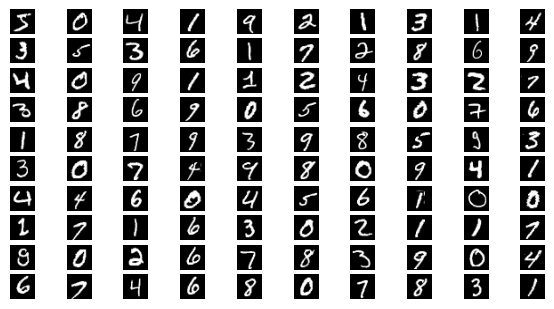

In [ ]:
# load data from Mnist dataset
(x_train, y_train),(x_test, y_test)=mnist.load_data() 
 
plt.figure(figsize=(7.195,3.841), dpi=100)
 
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow(x_train[i].reshape([28,28]), cmap='gray')
  plt.axis('off')

In [ ]:
x_train=x_train.reshape(60000,28*28*1)
x_test=x_test.reshape(10000,28*28*1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train /= 255
x_test /= 255


#one hot coding 
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [ ]:


learning_rate = 0.1
batch_size=64
nb_epoch=15

model= Sequential()
model.add(Dense(256,input_dim=784))

model.add(Activation('sigmoid'))
model.add(Dense(64))

model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = SGD(learning_rate)

model.compile(loss='categorical_crossentropy',optimizer=sgd ,metrics=['accuracy'])

model.fit(x_train,y_train,batch_size=batch_size,epochs=nb_epoch,verbose=1)

Epoch 1/15
938/938 [==============================] - 5s 5ms/step - loss: 1.1737 - accuracy: 0.6832
Epoch 2/15
938/938 [==============================] - 4s 4ms/step - loss: 0.4383 - accuracy: 0.8789
Epoch 3/15
938/938 [==============================] - 4s 4ms/step - loss: 0.3473 - accuracy: 0.8996
Epoch 4/15
938/938 [==============================] - 4s 4ms/step - loss: 0.3099 - accuracy: 0.9095
Epoch 5/15
938/938 [==============================] - 4s 4ms/step - loss: 0.2856 - accuracy: 0.9164
Epoch 6/15
938/938 [==============================] - 4s 4ms/step - loss: 0.2664 - accuracy: 0.9214
Epoch 7/15
938/938 [==============================] - 4s 4ms/step - loss: 0.2503 - accuracy: 0.9261
Epoch 8/15
938/938 [==============================] - 4s 4ms/step - loss: 0.2357 - accuracy: 0.9308
Epoch 9/15
938/938 [==============================] - 4s 4ms/step - loss: 0.2222 - accuracy: 0.9340
Epoch 10/15
938/938 [==============================] - 4s 4ms/step - loss: 0.2100 - accuracy: 0.9378

In [ ]:
class_mnist=['0','1','2','3','4','5','6','7','8','9']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
y_pred = model.predict(x_test)
X_test__ = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");


#confusion matrix and classification report 


plt.figure(figsize=(10, 10))
plot_confusion_matrix(mat, classes=['False','True'], normalize=True, title='Normalized confusion matrix')
plt.show()

# TP2

In [ ]:
from sklearn.datasets import load_breast_cancer,fetch_olivetti_faces

data_cancer=load_breast_cancer()
x=data_cancer.data
y=data_cancer.target



In [ ]:
def normalized(x):
  return(x-np.mean(x, axis=0))/(np.max(x,axis=0)-np.min(x,axis=0))

In [ ]:
x_norm=normalized(x)
x_train, x_test, y_train, y_test= train_test_split(x_norm, y, test_size=0.3, train_size=0.7, random_state=True)

In [ ]:
np.shape(x_train), np.shape(y_train)

((398, 30), (398,))

In [ ]:
#learning_rate = 0.01
batch_size=32
nb_epoch=200

model= Sequential()
model.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu',input_dim=30))


model.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu'))

model.add(Activation('sigmoid'))
model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))



model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

model.fit(x_train,y_train,batch_size=batch_size,epochs=nb_epoch,verbose=1)

Epoch 1/200
13/13 [==============================] - 1s 8ms/step - loss: 0.7729 - accuracy: 0.3744
Epoch 2/200
13/13 [==============================] - 0s 9ms/step - loss: 0.7521 - accuracy: 0.3744
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 0.7323 - accuracy: 0.3744
Epoch 4/200
13/13 [==============================] - 0s 7ms/step - loss: 0.7139 - accuracy: 0.3744
Epoch 5/200
13/13 [==============================] - 0s 8ms/step - loss: 0.6963 - accuracy: 0.3744
Epoch 6/200
13/13 [==============================] - 0s 10ms/step - loss: 0.6787 - accuracy: 0.4296
Epoch 7/200
13/13 [==============================] - 0s 11ms/step - loss: 0.6618 - accuracy: 0.8266
Epoch 8/200
13/13 [==============================] - 0s 9ms/step - loss: 0.6464 - accuracy: 0.9322
Epoch 9/200
13/13 [==============================] - 0s 8ms/step - loss: 0.6309 - accuracy: 0.9271
Epoch 10/200
13/13 [==============================] - 0s 9ms/step - loss: 0.6161 - accuracy: 0.9020
Epoch 1

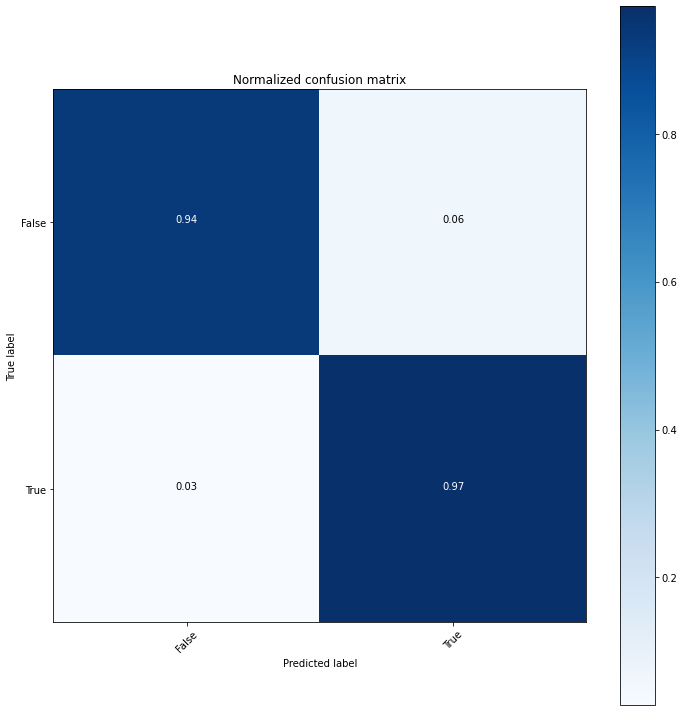

In [ ]:

y_pred = model.predict(x_test)
Y_pred = (y_pred>0.5)
mat = confusion_matrix(y_test, Y_pred)
plt.figure(figsize=(10, 10))
plot_confusion_matrix(mat, classes=['False','True'], normalize=True, title='Normalized confusion matrix')
plt.show()

# TP3

In [ ]:
(x_train, y_train),(x_test, y_test)=mnist.load_data() 
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)



In [ ]:
np.shape(x_train), np.shape(y_train)

((60000, 28, 28, 1), (60000, 10))

In [ ]:
def CNN(input_size):
  input = Input(input_size)
  
  x = Conv2D(filters=64, kernel_size = (3,3), activation="relu")(input)
  x = Conv2D(filters=64, kernel_size = (3,3), activation="relu")(x)
  x = MaxPooling2D(pool_size=(2,2))(x)
  x = BatchNormalization()(x)
  x = Conv2D(filters=128, kernel_size = (3,3), activation="relu")(x)
  x = Conv2D(filters=128, kernel_size = (3,3), activation="relu")(x)
  x = MaxPooling2D(pool_size=(2,2))(x)
  x = BatchNormalization()(x)  
  x = Conv2D(filters=256, kernel_size = (3,3), activation="relu")(x)
  x = MaxPooling2D(pool_size=(2,2))(x)
  x = Flatten()(x)
  x = BatchNormalization()(x)
  x = Dense(512,activation="relu")(x)
  output = Dense(10, activation='softmax')(x)
  
  
  model = Model(input, output)
  return model

In [ ]:


batch_size=100
nb_epoch=10
input_size=28,28,1


model=CNN(input_size)
model.compile(loss='categorical_crossentropy',optimizer='adam' ,metrics=['accuracy'])

model.fit(x_train,y_train,batch_size=batch_size,epochs=nb_epoch,verbose=1)

Epoch 1/10
600/600 [==============================] - 26s 28ms/step - loss: 0.0826 - accuracy: 0.9745
Epoch 2/10
600/600 [==============================] - 17s 28ms/step - loss: 0.0347 - accuracy: 0.9897
Epoch 3/10
600/600 [==============================] - 17s 28ms/step - loss: 0.0261 - accuracy: 0.9920
Epoch 4/10
600/600 [==============================] - 17s 28ms/step - loss: 0.0210 - accuracy: 0.9934
Epoch 5/10
600/600 [==============================] - 17s 28ms/step - loss: 0.0182 - accuracy: 0.9943
Epoch 6/10
600/600 [==============================] - 17s 28ms/step - loss: 0.0178 - accuracy: 0.9942
Epoch 7/10
600/600 [==============================] - 17s 28ms/step - loss: 0.0119 - accuracy: 0.9959
Epoch 8/10
600/600 [==============================] - 17s 28ms/step - loss: 0.0118 - accuracy: 0.9961
Epoch 9/10
600/600 [==============================] - 17s 28ms/step - loss: 0.0146 - accuracy: 0.9953
Epoch 10/10
600/600 [==============================] - 17s 28ms/step - loss: 0.010

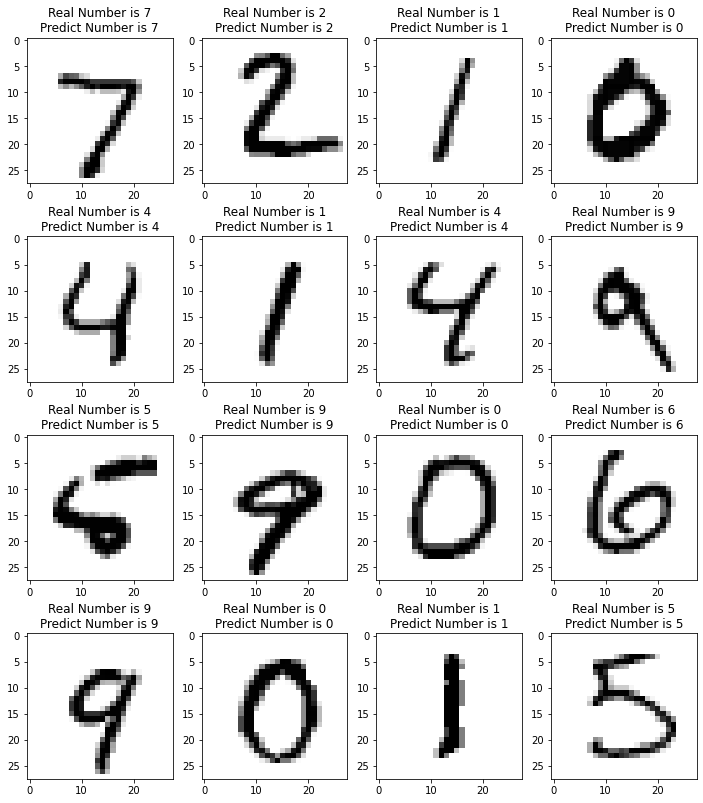

In [ ]:
y_pred = model.predict(x_test)
X_test__ = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

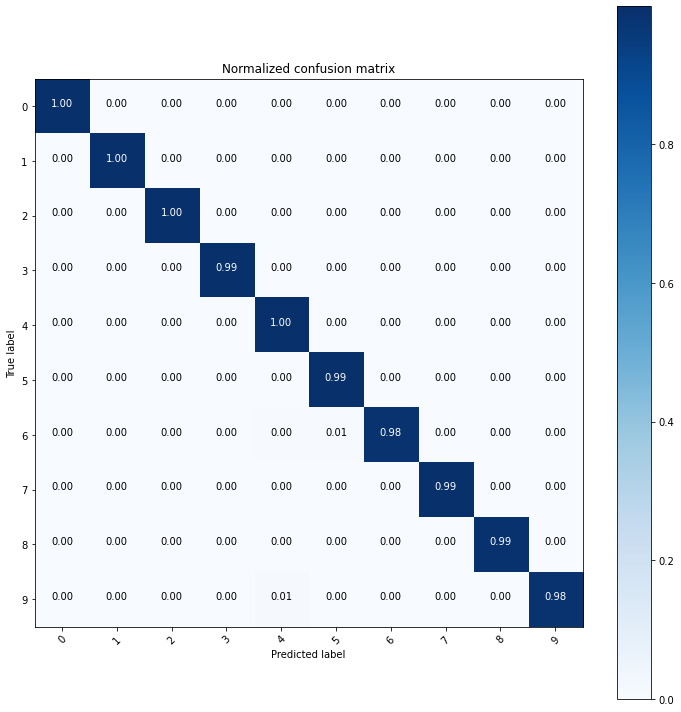

In [ ]:

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels
mat = confusion_matrix(Y_test, Y_pred)
#sns.heatmap(mat.T, square=False, annot=True, cbar=False, cmap=plt.cm.Blues)
#plt.xlabel('Predicted Values')
#plt.ylabel('True Values');
#plt.show();
plt.figure(figsize=(10, 10))
plot_confusion_matrix(mat, classes=class_mnist, normalize=True, title='Normalized confusion matrix')
plt.show()

In [ ]:
(x_train, y_train),(x_test, y_test)=cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)


170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
batch_size=100
nb_epoch=20
input_size=32,32,3

model=CNN(input_size)
model.compile(loss='categorical_crossentropy',optimizer='adam' ,metrics=['accuracy'])

model.fit(x_train,y_train,batch_size=batch_size,epochs=nb_epoch,verbose=1)

Epoch 1/20
500/500 [==============================] - 18s 32ms/step - loss: 1.3597 - accuracy: 0.5139
Epoch 2/20
500/500 [==============================] - 17s 33ms/step - loss: 0.8965 - accuracy: 0.6860
Epoch 3/20
500/500 [==============================] - 17s 33ms/step - loss: 0.7001 - accuracy: 0.7558
Epoch 4/20
500/500 [==============================] - 16s 32ms/step - loss: 0.5595 - accuracy: 0.8047
Epoch 5/20
500/500 [==============================] - 16s 32ms/step - loss: 0.4433 - accuracy: 0.8442
Epoch 6/20
500/500 [==============================] - 16s 32ms/step - loss: 0.3517 - accuracy: 0.8758
Epoch 7/20
500/500 [==============================] - 16s 32ms/step - loss: 0.2739 - accuracy: 0.9043
Epoch 8/20
500/500 [==============================] - 16s 31ms/step - loss: 0.2080 - accuracy: 0.9264
Epoch 9/20
500/500 [==============================] - 16s 32ms/step - loss: 0.1662 - accuracy: 0.9412
Epoch 10/20
500/500 [==============================] - 16s 32ms/step - loss: 0.140

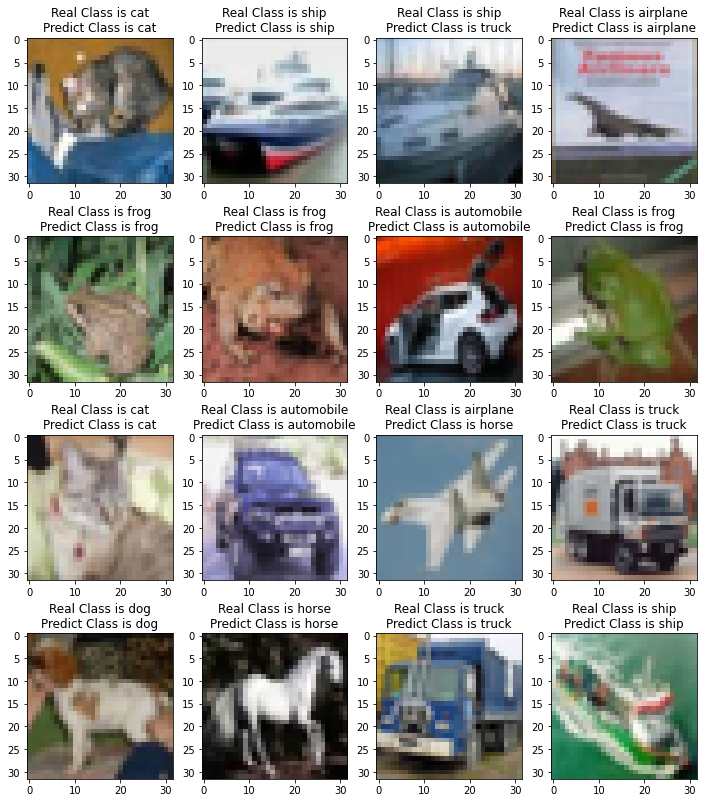

In [ ]:
classes=['airplane', 'automobile' ,'bird' ,'cat' ,'deer' ,'dog' ,'frog' ,'horse' ,'ship' ,'truck']
y_pred = model.predict(x_test)
X_test__ = x_test.reshape(x_test.shape[0], 32, 32,3)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Class is {classes[y_test[i].argmax()]}\nPredict Class is {classes[y_pred[i].argmax()]}");

<Figure size 720x720 with 0 Axes>

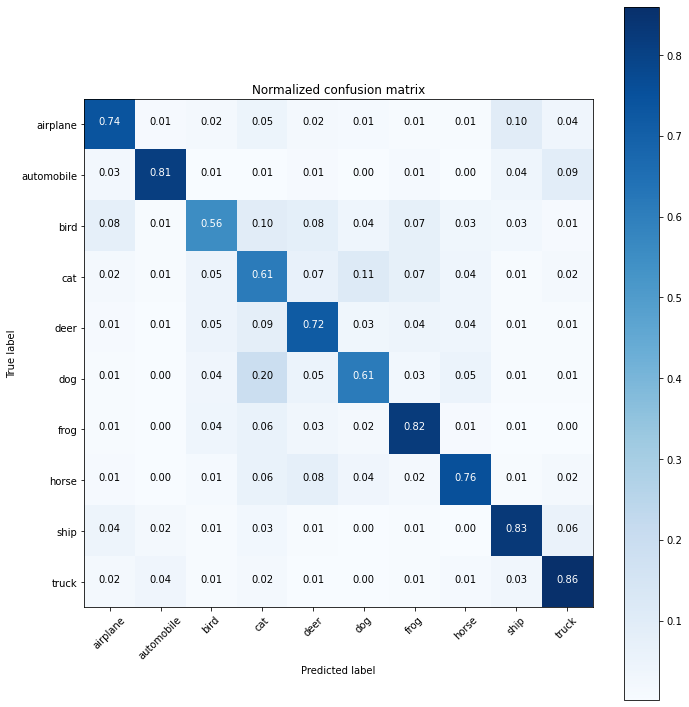

In [ ]:
fig = plt.figure(figsize=(10, 10))
Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels
mat = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(10, 10))
plot_confusion_matrix(mat, classes=classes, normalize=True, title='Normalized confusion matrix')
plt.show()

# TP4